# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas_220603_fullrun"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '220603_fullrun'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major.y=element_line()))

In [4]:
colors_dict = read_json("colors.json")
color_map <- c(
    "Identity(AgeSex)+MLP" = colors_dict$pastel$red$mid,
    "Identity(Records)+MLP" = colors_dict$pastel$red$mid,
    "GNN(Records)+MLP" = colors_dict$pastel$red$mid,
    "Identity(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid,
    "GNN(AgeSex+Records)+MLP" = colors_dict$pastel$red$mid
)

In [5]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)
endpoints_md = fread(glue("{experiment_path}/endpoints.csv"), colClasses=c("phecode"="character"))
endpoints = sort(endpoints_md$endpoint)

In [6]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint

In [7]:
endpoint_selection = c(
    
   'phecode_401', #  "Hypertension", # intervention
    'phecode_202', #  "Diabetes mellitus", # intervention
    'phecode_416-21', #  "Atrial fibrillation", # intervention
    'phecode_468', #  "Pneumonia", # intervention
    'phecode_474', #  "Chronic obstructive pulmonary disease [COPD]", # interventio
    'phecode_583', #  "Chronic kidney disease", # intervention
    
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_424', #  "Heart failure", # intervention
    'phecode_420', #  "Cardiac arrest", # intervention
    'OMOP_4306655', #  "All-Cause Death", # intervention
    
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_413-11', #  "Mitral valve insufficiency",
    'phecode_410-2',#  "Endocarditis",
    'phecode_400',#  "Rheumatic fever and chronic rheumatic heart diseases",	
    
    'phecode_164', #  "Anemia", # intervention
    'phecode_718',  #  "Back pain", # intervention
    'phecode_324-11', #  "Parkinson's disease (Primary)",
    'phecode_705-1', #  "Rheumatoid arthritis", # NEW + interventio
    'phecode_665', #  "Psoriasis", # interesting
    'phecode_284'#  "Suicide ideation and attempt or self harm" # intervention
)

endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

## Load data

# Load Benchmarks

In [21]:
today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
#today = '2022-07-05'
name = glue("benchmarks_cindex_{today}")
benchmark_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather")) %>% left_join(endpoints_md) 

Joining, by = "endpoint"



In [13]:
benchmark_endpoints

endpoint,score,iteration,time,cindex,V1,eligable,n,freq,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
OMOP_4306655,Age+Sex,49,10,0.6961114,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,Retina,49,10,0.7040435,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,Age+Sex+Retina,49,10,0.7001790,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,SCORE2,49,10,0.7045378,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,SCORE2+Retina,49,10,0.7074337,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD,49,10,0.7023789,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,49,10,0.7050812,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,QRISK3,49,10,0.7114935,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,QRISK3+Retina,49,10,0.7135755,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA


In [25]:
benchmark_endpoints %>% group_by(endpoint, score) %>% summarise(cindex=mean(cindex)) %>% group_by(score) %>% summarise(mean(cindex)) %>% arrange(`mean(cindex)`)

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



score,mean(cindex)
<chr>,<dbl>
Age+Sex,NA
Age+Sex+Retina,NA
ASCVD,NA
ASCVD+Retina,NA
QRISK3,NA
QRISK3+Retina,NA
Retina,NA
SCORE2,NA
SCORE2+Retina,NA


In [26]:
endpoints_sorted = (benchmark_endpoints %>% 
    filter(score == "Age+Sex+Retina") %>% 
    group_by(endpoint, score) %>% 
    summarise(cindex=mean(cindex, na.rm=TRUE)) %>% 
    arrange(cindex) %>% ungroup())$endpoint

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



In [27]:
categories_sorted = (endpoint_defs %>% distinct(phecode_category))$phecode_category

In [28]:
benchmark_endpoints

endpoint,score,iteration,time,cindex,V1,eligable,n,freq,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
OMOP_4306655,Age+Sex,49,10,0.6961114,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,Retina,49,10,0.7040435,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,Age+Sex+Retina,49,10,0.7001790,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,SCORE2,49,10,0.7045378,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,SCORE2+Retina,49,10,0.7074337,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD,49,10,0.7023789,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,ASCVD+Retina,49,10,0.7050812,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,QRISK3,49,10,0.7114935,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA
OMOP_4306655,QRISK3+Retina,49,10,0.7135755,0,61256,3548,0.057920857,4306655,All-Cause Death,Death,Both,NA,NA,NA


benchmark_endpoints## General Performance

Warning message:
“package ‘ggtext’ was built under R version 4.0.3”
Warning message:
“package ‘ggdist’ was built under R version 4.0.5”
Warning message:
“Removed 11 rows containing missing values (geom_point).”


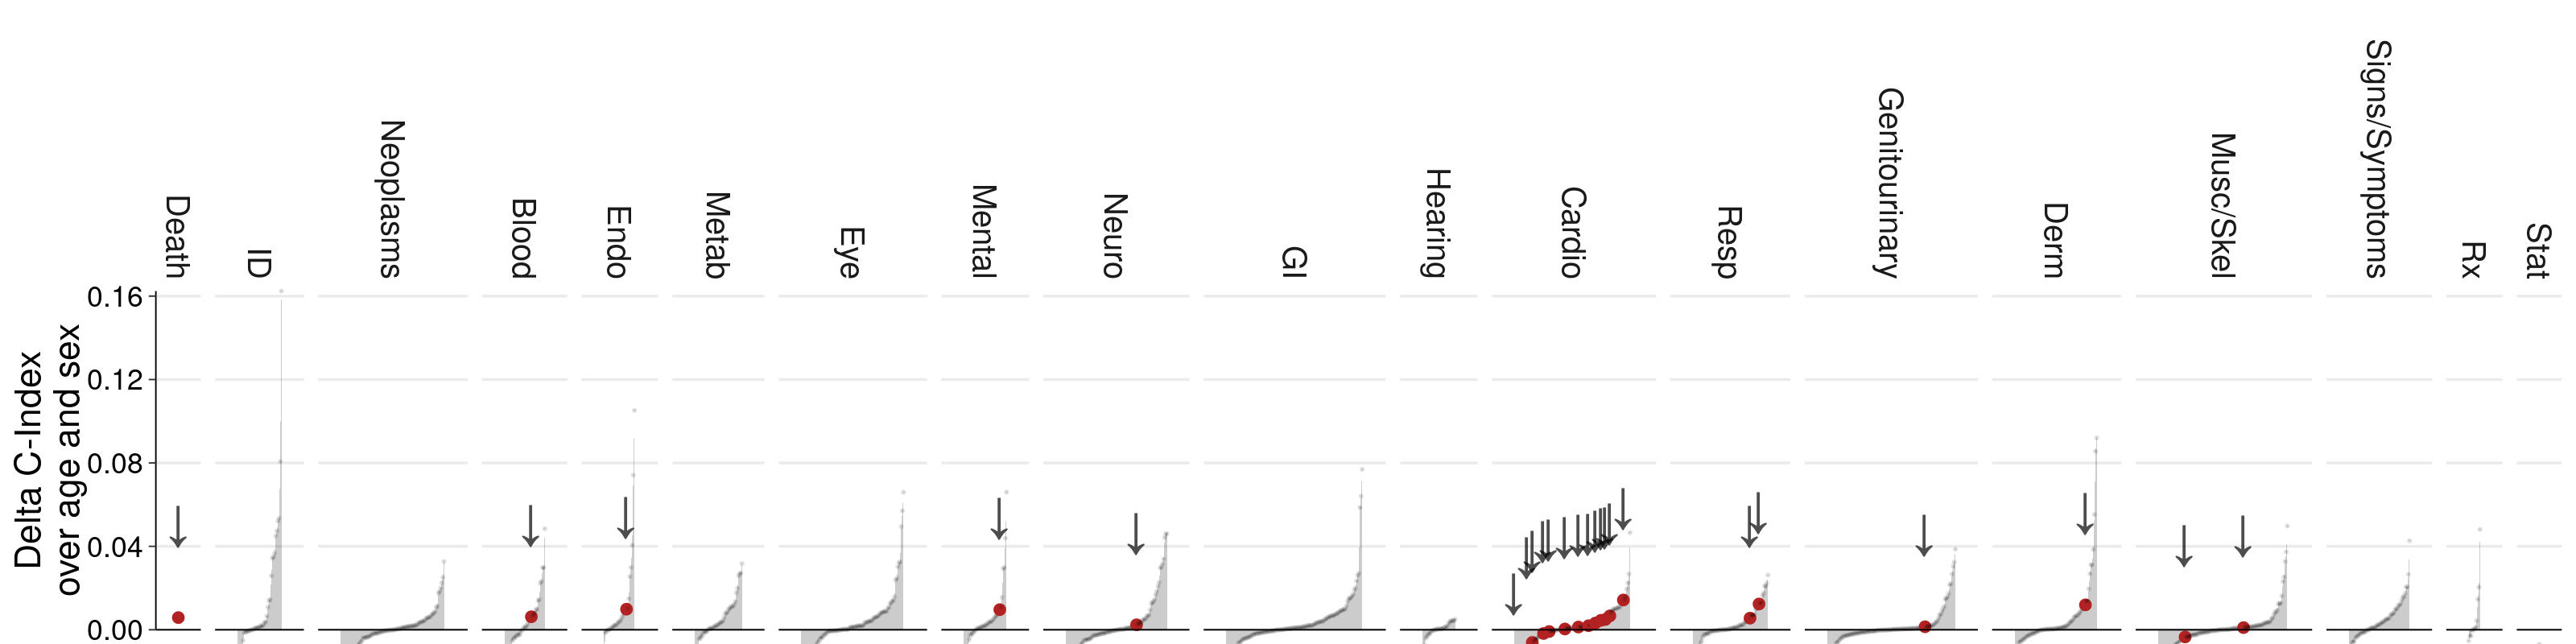

In [29]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)
library(ggdist)

scores_plot = c("Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

temp = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    group_by(endpoint, phecode_string, freq, phecode_category) %>%
    median_qi(delta) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted))

endpoint_order = (temp %>% arrange(delta))$endpoint

temp = temp %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number())

overview = ggplot(temp) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=delta), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=delta, color=highlight, size=highlight, alpha=highlight)) +
    geom_text(data=temp %>% filter(highlight=="YES"), aes(x=endpoint, y=delta+0.045, label="↓"), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y="Delta C-Index\nover age and sex")+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(0, NA), clip = "off")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=20))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major=element_blank(), 
         strip.text = element_text(angle=270, hjust=1)) + 
    theme(legend.position="none") 
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
overview

In [30]:
temp 

endpoint,phecode_string,freq,phecode_category,delta,.lower,.upper,.width,.point,.interval,pos,highlight
<int>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Pterygium of eye,0.001849064,Eye,-0.08116919,-0.14012701,0.0037309846,0.95,median,qi,neg,NO
1,Polyneuropathy in diseases classified elsewhere,0.002760581,Neuro,-0.07971858,-0.12306958,0.0065151880,0.95,median,qi,neg,NO
1,Lipoma of intrathoracic organs,0.001911296,Neoplasms,-0.06569646,-0.10467250,-0.0055507297,0.95,median,qi,neg,NO
2,Paralytic strabismus [Neurogenic strabismus],0.002156792,Eye,-0.05340173,-0.11287331,-0.0186611371,0.95,median,qi,neg,NO
3,Abnormal results of function studies of eye,0.003036834,Eye,-0.04924690,-0.10642476,0.0265905792,0.95,median,qi,neg,NO
1,Celiac disease,0.003690824,GI,-0.04439567,-0.07599850,-0.0135029785,0.95,median,qi,neg,NO
1,Aplastic anemia,0.002466232,Blood,-0.04299582,-0.06483849,-0.0123328579,0.95,median,qi,neg,NO
2,Hepatic failure,0.002499061,GI,-0.04170521,-0.06536377,-0.0008823154,0.95,median,qi,neg,NO
1,Allergy to serum and vaccine,0.001715154,Signs/Symptoms,-0.04052744,-0.07610870,-0.0056176269,0.95,median,qi,neg,NO


[1] 0.9500797

In [31]:
temp %>% ungroup() %>% group_by(.lower>0) %>% tally()

.lower > 0,n
<lgl>,<int>
FALSE,954
TRUE,206
NA,11


In [ ]:
1789/1883

In [32]:
temp %>% ungroup() %>% filter(.lower>0) %>% median_qi(delta, .width = c(.25))

delta,.lower,.upper,.width,.point,.interval
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.007028987,0.004503001,0.01003266,0.25,median,qi


In [35]:
temp %>% filter(delta>0.098) %>% arrange(delta)

endpoint,phecode_string,freq,phecode_category,delta,.lower,.upper,.width,.point,.interval,pos,highlight
<int>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
28,Testicular dysfunction,0.003688715,Endo,0.1051531,0.01679919,0.1699652,0.95,median,qi,pos,NO
40,Mycobacteria,0.001855531,ID,0.1624071,0.05388561,0.2281205,0.95,median,qi,pos,NO


In [36]:
library(ggdist)

In [37]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

## Performance against CVD Scores

In [38]:
SCORE2: Myocardial infarction, Stroke, hypertensive heart disease, Ischemic heart disease, heart failure, arrhythmias, cardiovascular death + cardiac arrest
ASCVD: 
QRISK3:  Ischemic heart disease, Myocardial infarction, TIA, stroke

AF: some scores ESC


ERROR: Error in parse(text = x, srcfile = src): <text>:1:20: unexpected symbol
1: SCORE2: Myocardial infarction
                       ^


In [39]:
plot_width = 8.25; plot_height=2; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

plot_against_score = function(score1, score2, endpoint_order=c()){
    
    scores_plot = c(score1, score2)#, "AgeSexRetina"
    
    score_label = glue("{score1} vs. {score2}")
    #print(score_label)

    temp = benchmark_endpoints %>% 
        filter(score %in% scores_plot) %>% 
        mutate(score = factor(score, levels=scores_plot)) %>%
        mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
        group_by(endpoint, score, phecode_string, phecode_category) %>%
        ungroup() %>%
        pivot_wider(names_from=score, values_from=cindex) %>% 
        mutate(id = row_number()) %>%
        mutate(delta = !!sym(score2)-!!sym(score1)) %>%
        mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
        mutate(endpoint = fct_reorder(endpoint, delta)) %>%
        mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
        mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
        filter(endpoint %in% endpoint_selection) #%>% mutate(endpoint=factor(endpoint, levels=endpoint_order_diff))
    
    temp_abs = temp %>% group_by(endpoint) %>% summarise(delta=median(delta), m_score2=median(!!sym(score2)), m_score1=median(!!sym(score1))) %>% ungroup() 
    #print(levels(temp_abs$endpoint))
    
    temp_abs_segment = temp_abs %>% rowwise() %>% mutate(min_cindex = min(m_score1, m_score2), max_cindex=max(m_score1, m_score2)) %>% ungroup()# %>% filter(abs(min_cindex-max_cindex)>0.02) 
    
    if (length(endpoint_order)>0){
        temp = temp %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        temp_abs = temp_abs %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        temp_abs_segment = temp_abs_segment %>% filter(endpoint %in% endpoint_order) %>% mutate(endpoint=factor(endpoint, levels=endpoint_order))
        }
    #print(temp_abs_segment)
    
    abs = ggplot(temp_abs) + 
        #geom_violin(aes(x=fct_rev(endpoint), y=delta), size=0.5) +
        labs(y="Concordance Index", title=score_label)+

        #geom_segment(data=temp_abs_segment, mapping=aes(x=endpoint, xend=endpoint, y=min_cindex+0.01, yend=max_cindex-0.01), alpha=0.4)+#, arrow = arrow(length = unit(0.01, "npc")), arrow.fill="black")+#+
        geom_segment(aes(x=fct_rev(endpoint), xend=fct_rev(endpoint), y=m_score1+0.01, yend=m_score2-0.01), alpha=0.4, arrow = arrow(length = unit(0.01, "npc")), arrow.fill="black")+#,
    
        geom_point(aes(x=fct_rev(endpoint), y=m_score1), size=1, color="black", alpha=0.7)+
        #geom_point(aes(x=fct_rev(endpoint), y=m_asm), size=1, color="#023768", alpha=0.7)+
        geom_point(aes(x=fct_rev(endpoint), y=m_score2), size=1.5, color="firebrick", alpha=0.7)+

        scale_x_discrete(labels=endpoint_map) +

        coord_flip(ylim=c(0.5, 0.9))+
         theme(strip.text = element_text(angle=270), axis.title.y=element_blank()) + 
        theme(legend.position="none")

        #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
    #geom_violin(size=0.1)
    rel = ggplot(temp) + 
        #geom_violin(aes(x=fct_rev(endpoint), y=delta), size=0.5) +
        labs(y="Difference in Concordance Index")+
        geom_hline(yintercept=0, size=0.25, alpha=0.5, linetype="22") + 
        stat_pointinterval(aes(x=fct_rev(endpoint), y=delta), size=0.5)+

        theme(axis.title.y=element_blank(),
            axis.text.y=element_blank(),
           axis.ticks.y=element_blank()) + 
        coord_flip(ylim=c(-0.01, 0.23))+
         theme(strip.text = element_text(angle=270)) + 
        theme(legend.position="none")

        #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
    #geom_violin(size=0.1) 
    return(abs|rel)
    }

In [40]:
library(ggdist)

In [41]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major=element_line()))

In [42]:
endpoint_order=c()
length(endpoint_order)

[1] 0

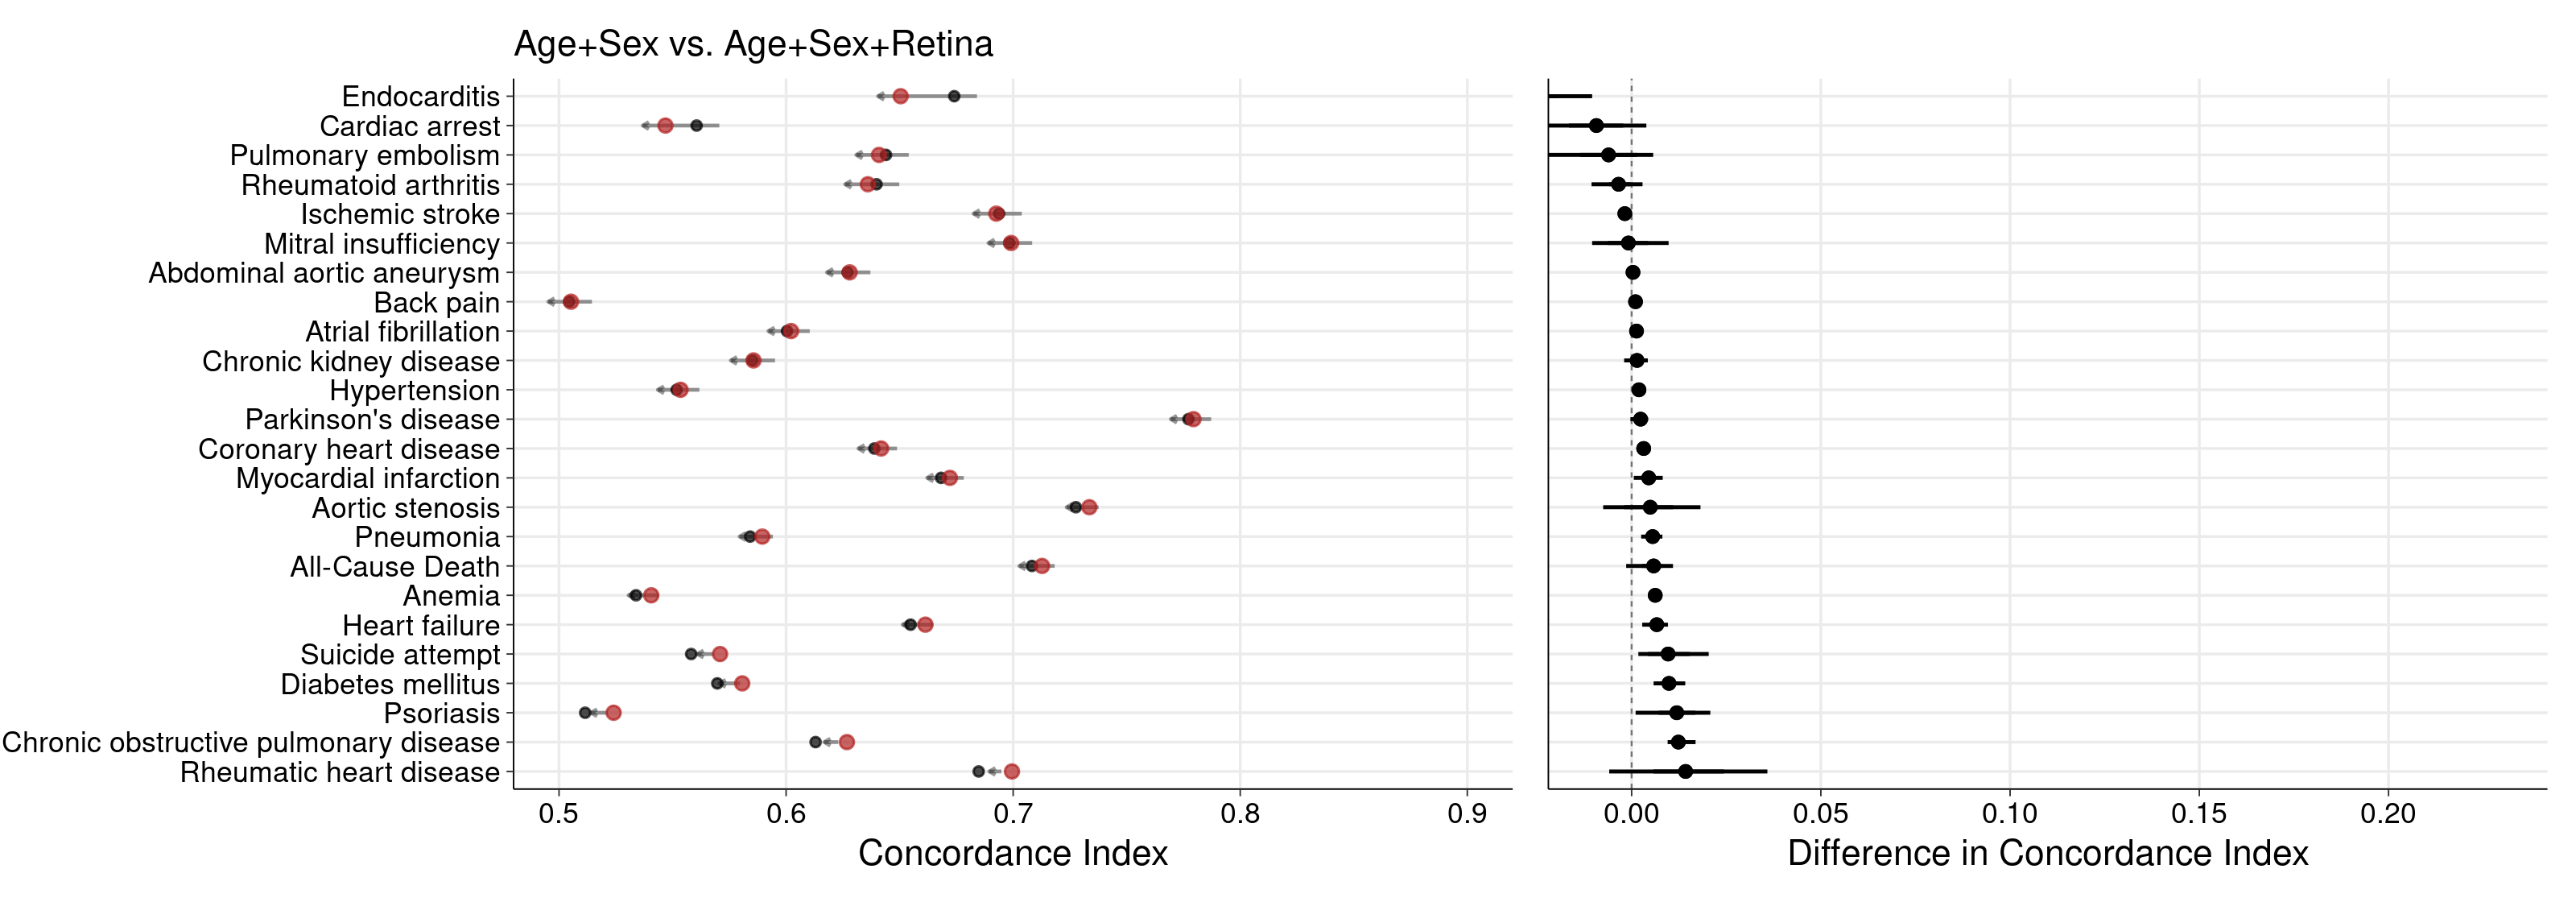

In [43]:
plot_width = 10; plot_height=3.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

fig1 = plot_against_score("Age+Sex", "Age+Sex+Retina")  
fig1

In [44]:
endpoints_cvd = c(
    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_424', #  "Heart failure", # intervention
     'OMOP_4306655', #  "All-Cause Death", # intervention
    'phecode_420' #  "Cardiac arrest", # intervention
   
)

Warning message:
“Removed 11 rows containing missing values (geom_point).”


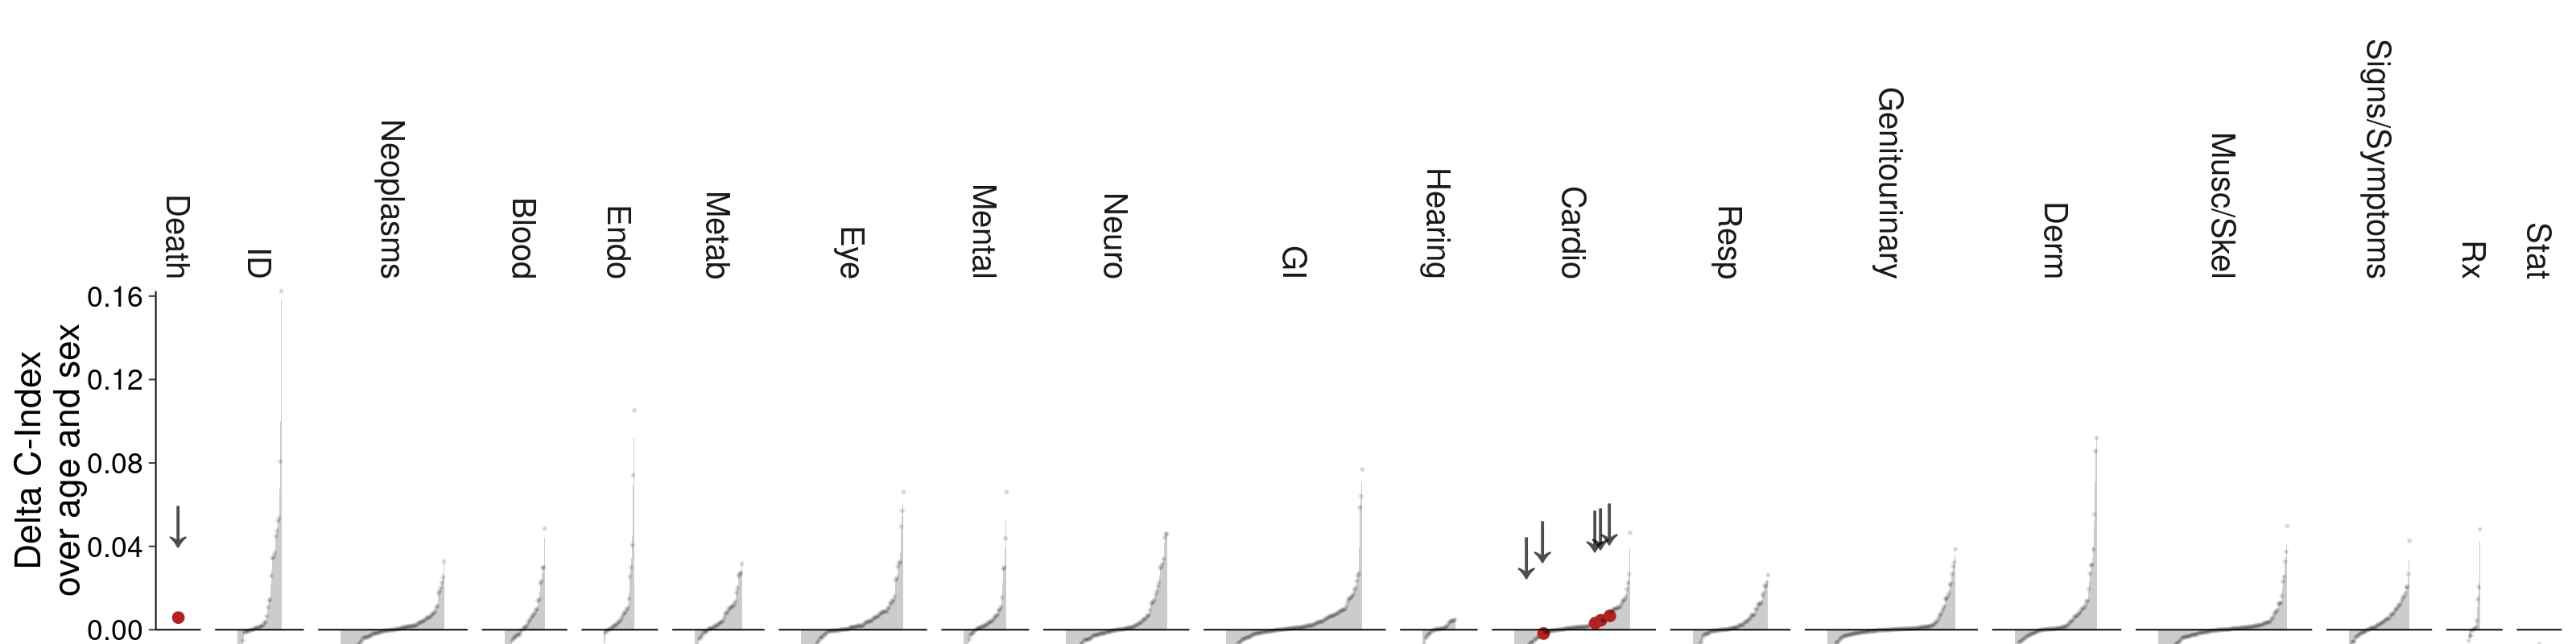

In [45]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)

scores_plot = c("Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

temp = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    group_by(endpoint, phecode_string, freq, phecode_category) %>%
    median_qi(delta) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoints_cvd ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted))

endpoint_order = (temp %>% arrange(delta))$endpoint

temp = temp %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number())

overview = ggplot(temp) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=delta), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=delta, color=highlight, size=highlight, alpha=highlight)) +
    geom_text(data=temp %>% filter(highlight=="YES"), aes(x=endpoint, y=delta+0.045, label="↓"), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y="Delta C-Index\nover age and sex")+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(0, NA), clip = "off")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=20))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major=element_blank(), 
         strip.text = element_text(angle=270, hjust=1)) + 
    theme(legend.position="none") 
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
overview

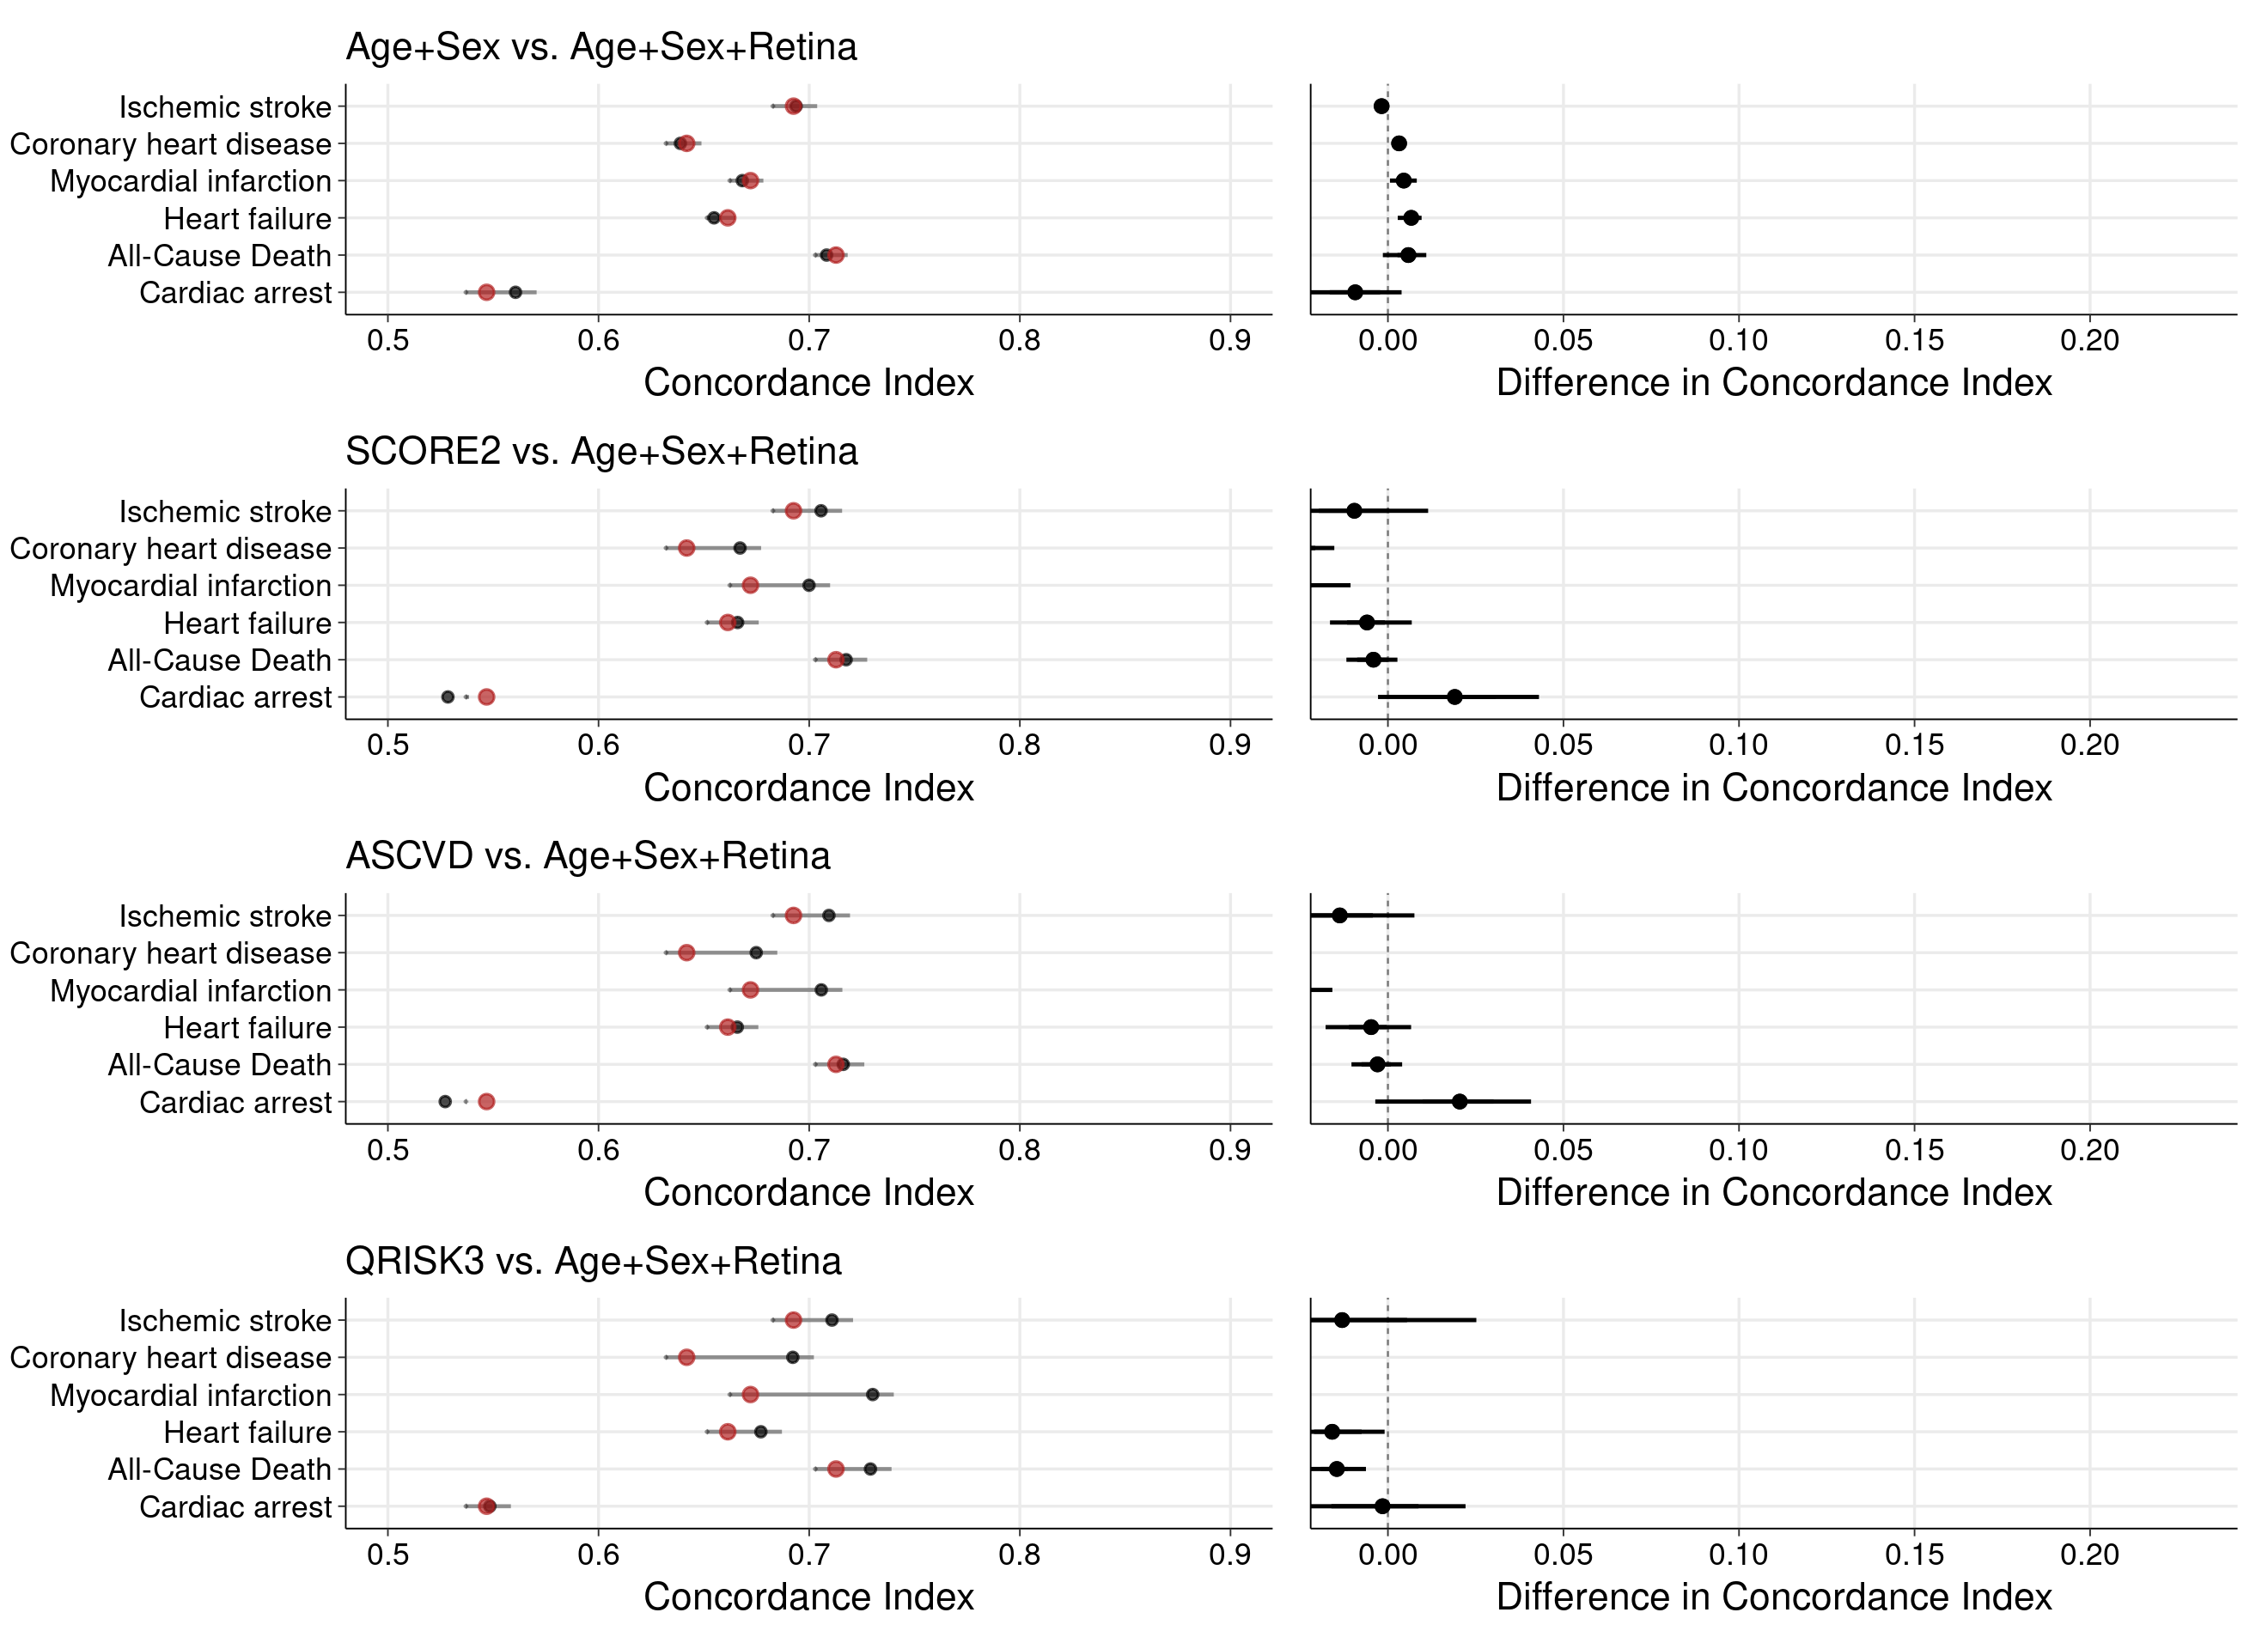

In [46]:
plot_width = 8.25; plot_height=6; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)


fig1 = plot_against_score("Age+Sex", "Age+Sex+Retina", endpoints_cvd) 
fig2 = plot_against_score("SCORE2", "Age+Sex+Retina", endpoints_cvd) 
fig3 = plot_against_score("ASCVD", "Age+Sex+Retina", endpoints_cvd)
fig4 = plot_against_score("QRISK3", "Age+Sex+Retina", endpoints_cvd) 

fig1/fig2/fig3/fig4 

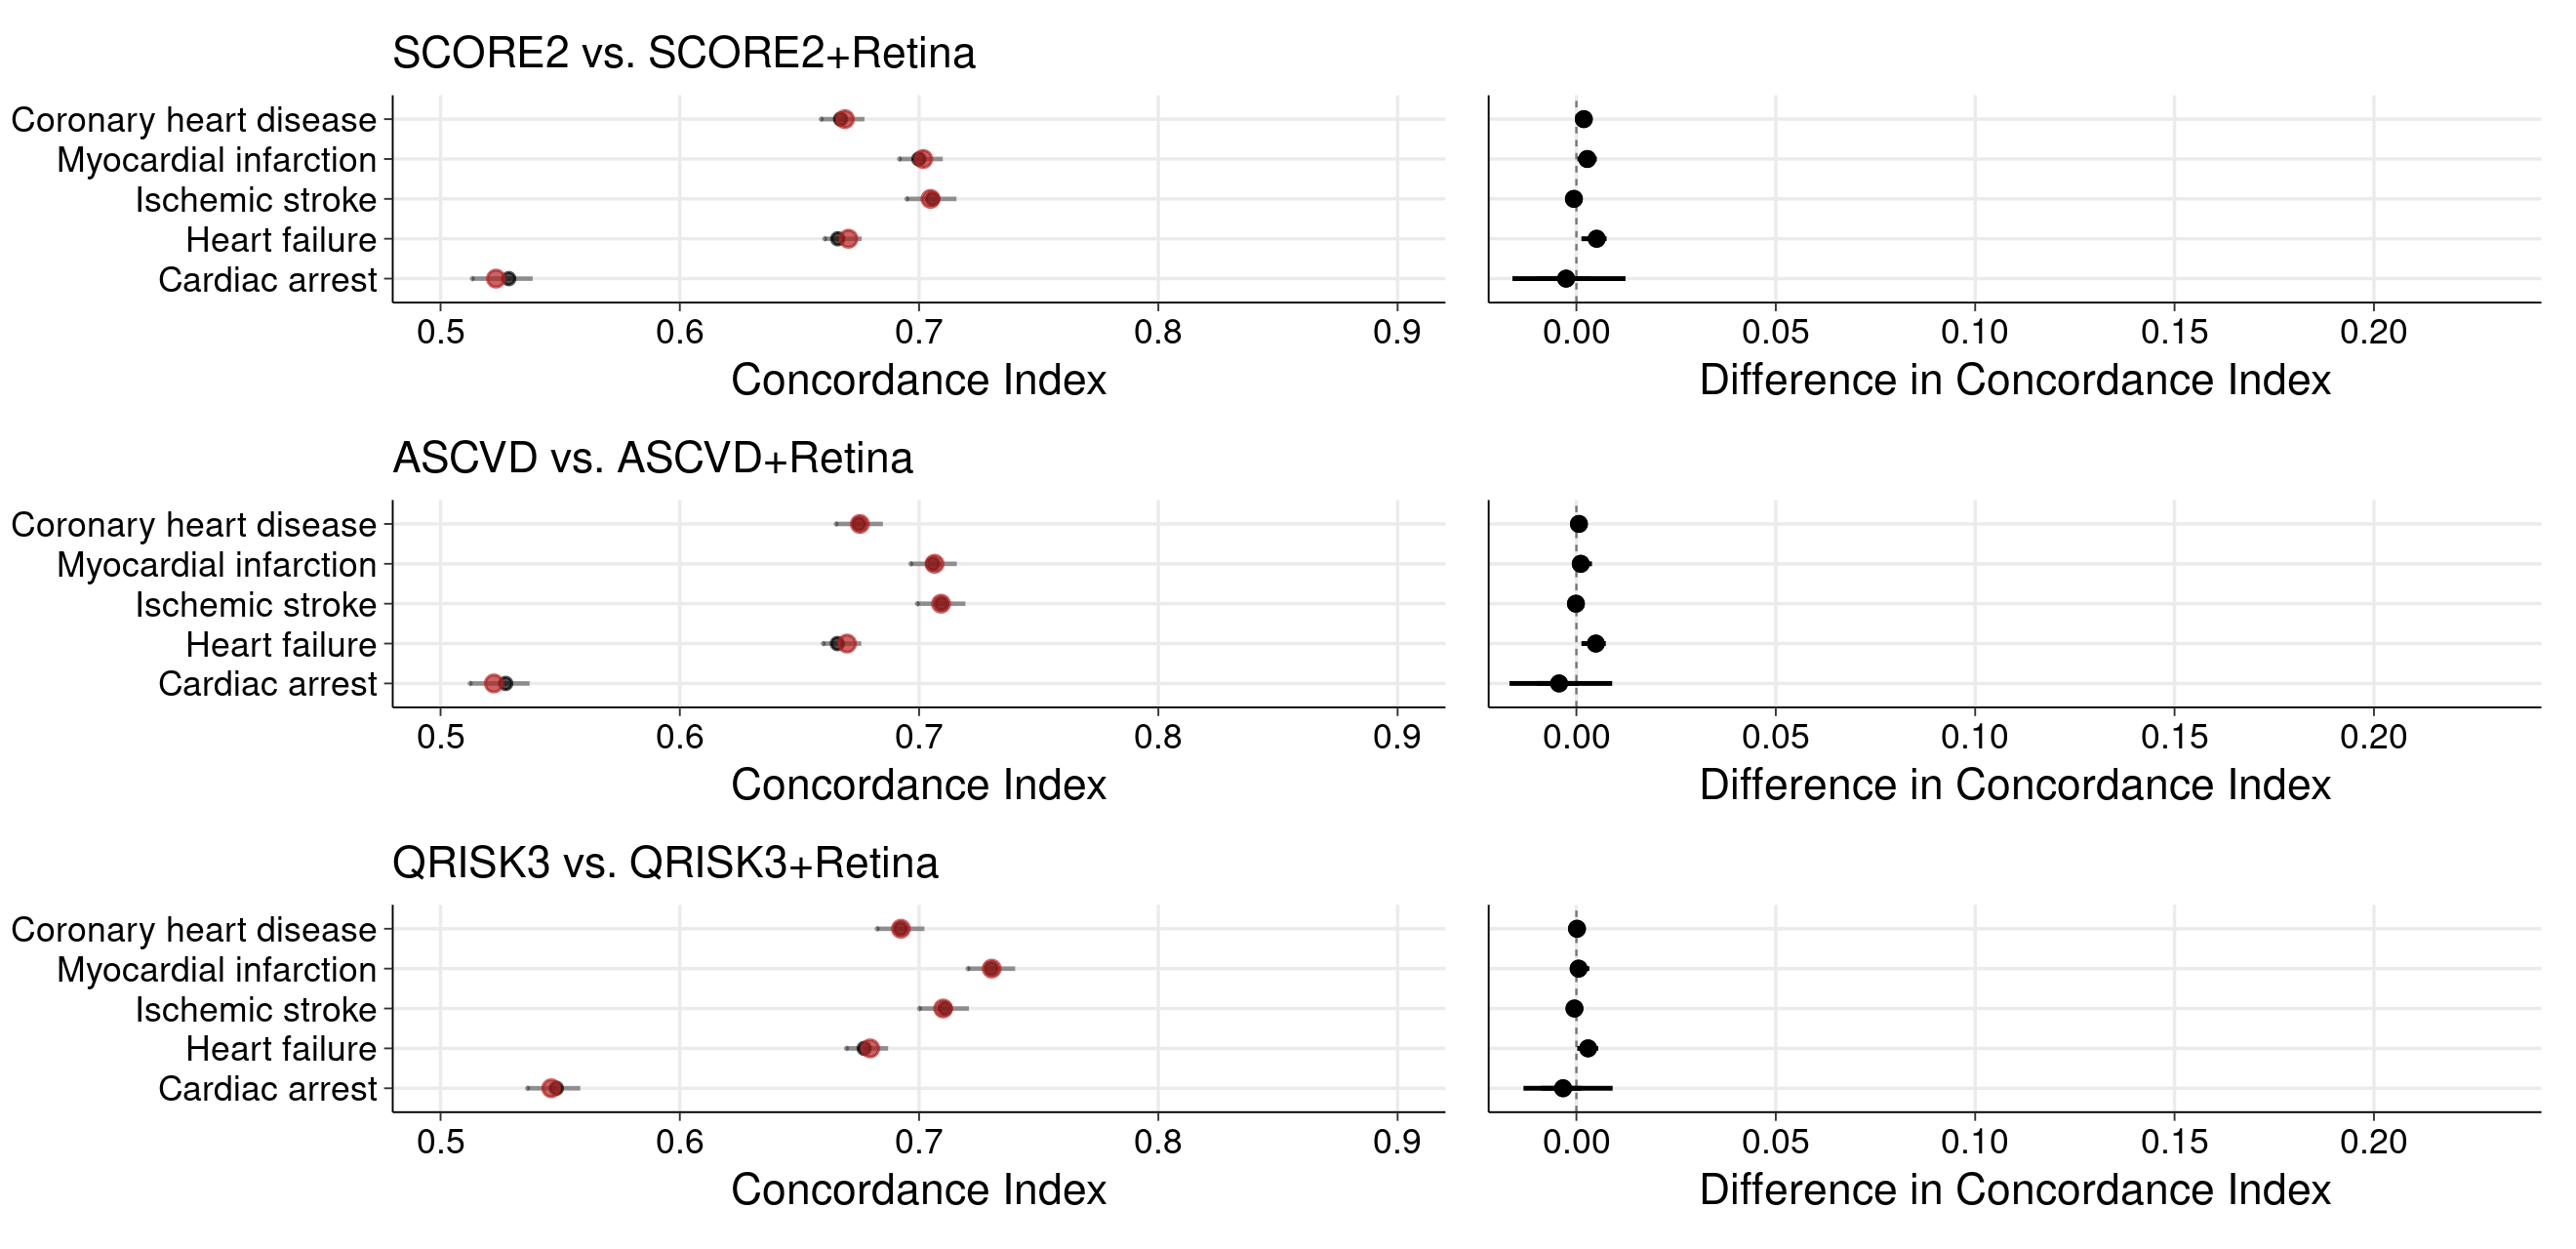

In [47]:
plot_width = 8.25; plot_height=4; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

endpoints_cvd = c(
    'phecode_404', #  "Ischemic heart disease",
    'phecode_404-1', #  "Myocardial infarction [Heart attack]", # intervention
    'phecode_431-11', #  "Cerebral infarction [Ischemic stroke]",
    'phecode_424', #  "Heart failure", # intervention
    'phecode_420' #  "Cardiac arrest", # intervention
)

fig2 = plot_against_score("SCORE2", "SCORE2+Retina", endpoints_cvd) 
fig3 = plot_against_score("ASCVD", "ASCVD+Retina", endpoints_cvd)
fig4 = plot_against_score("QRISK3", "QRISK3+Retina", endpoints_cvd) 

fig2/fig3/fig4 

Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 11 rows containing missing values (geom_segment).”


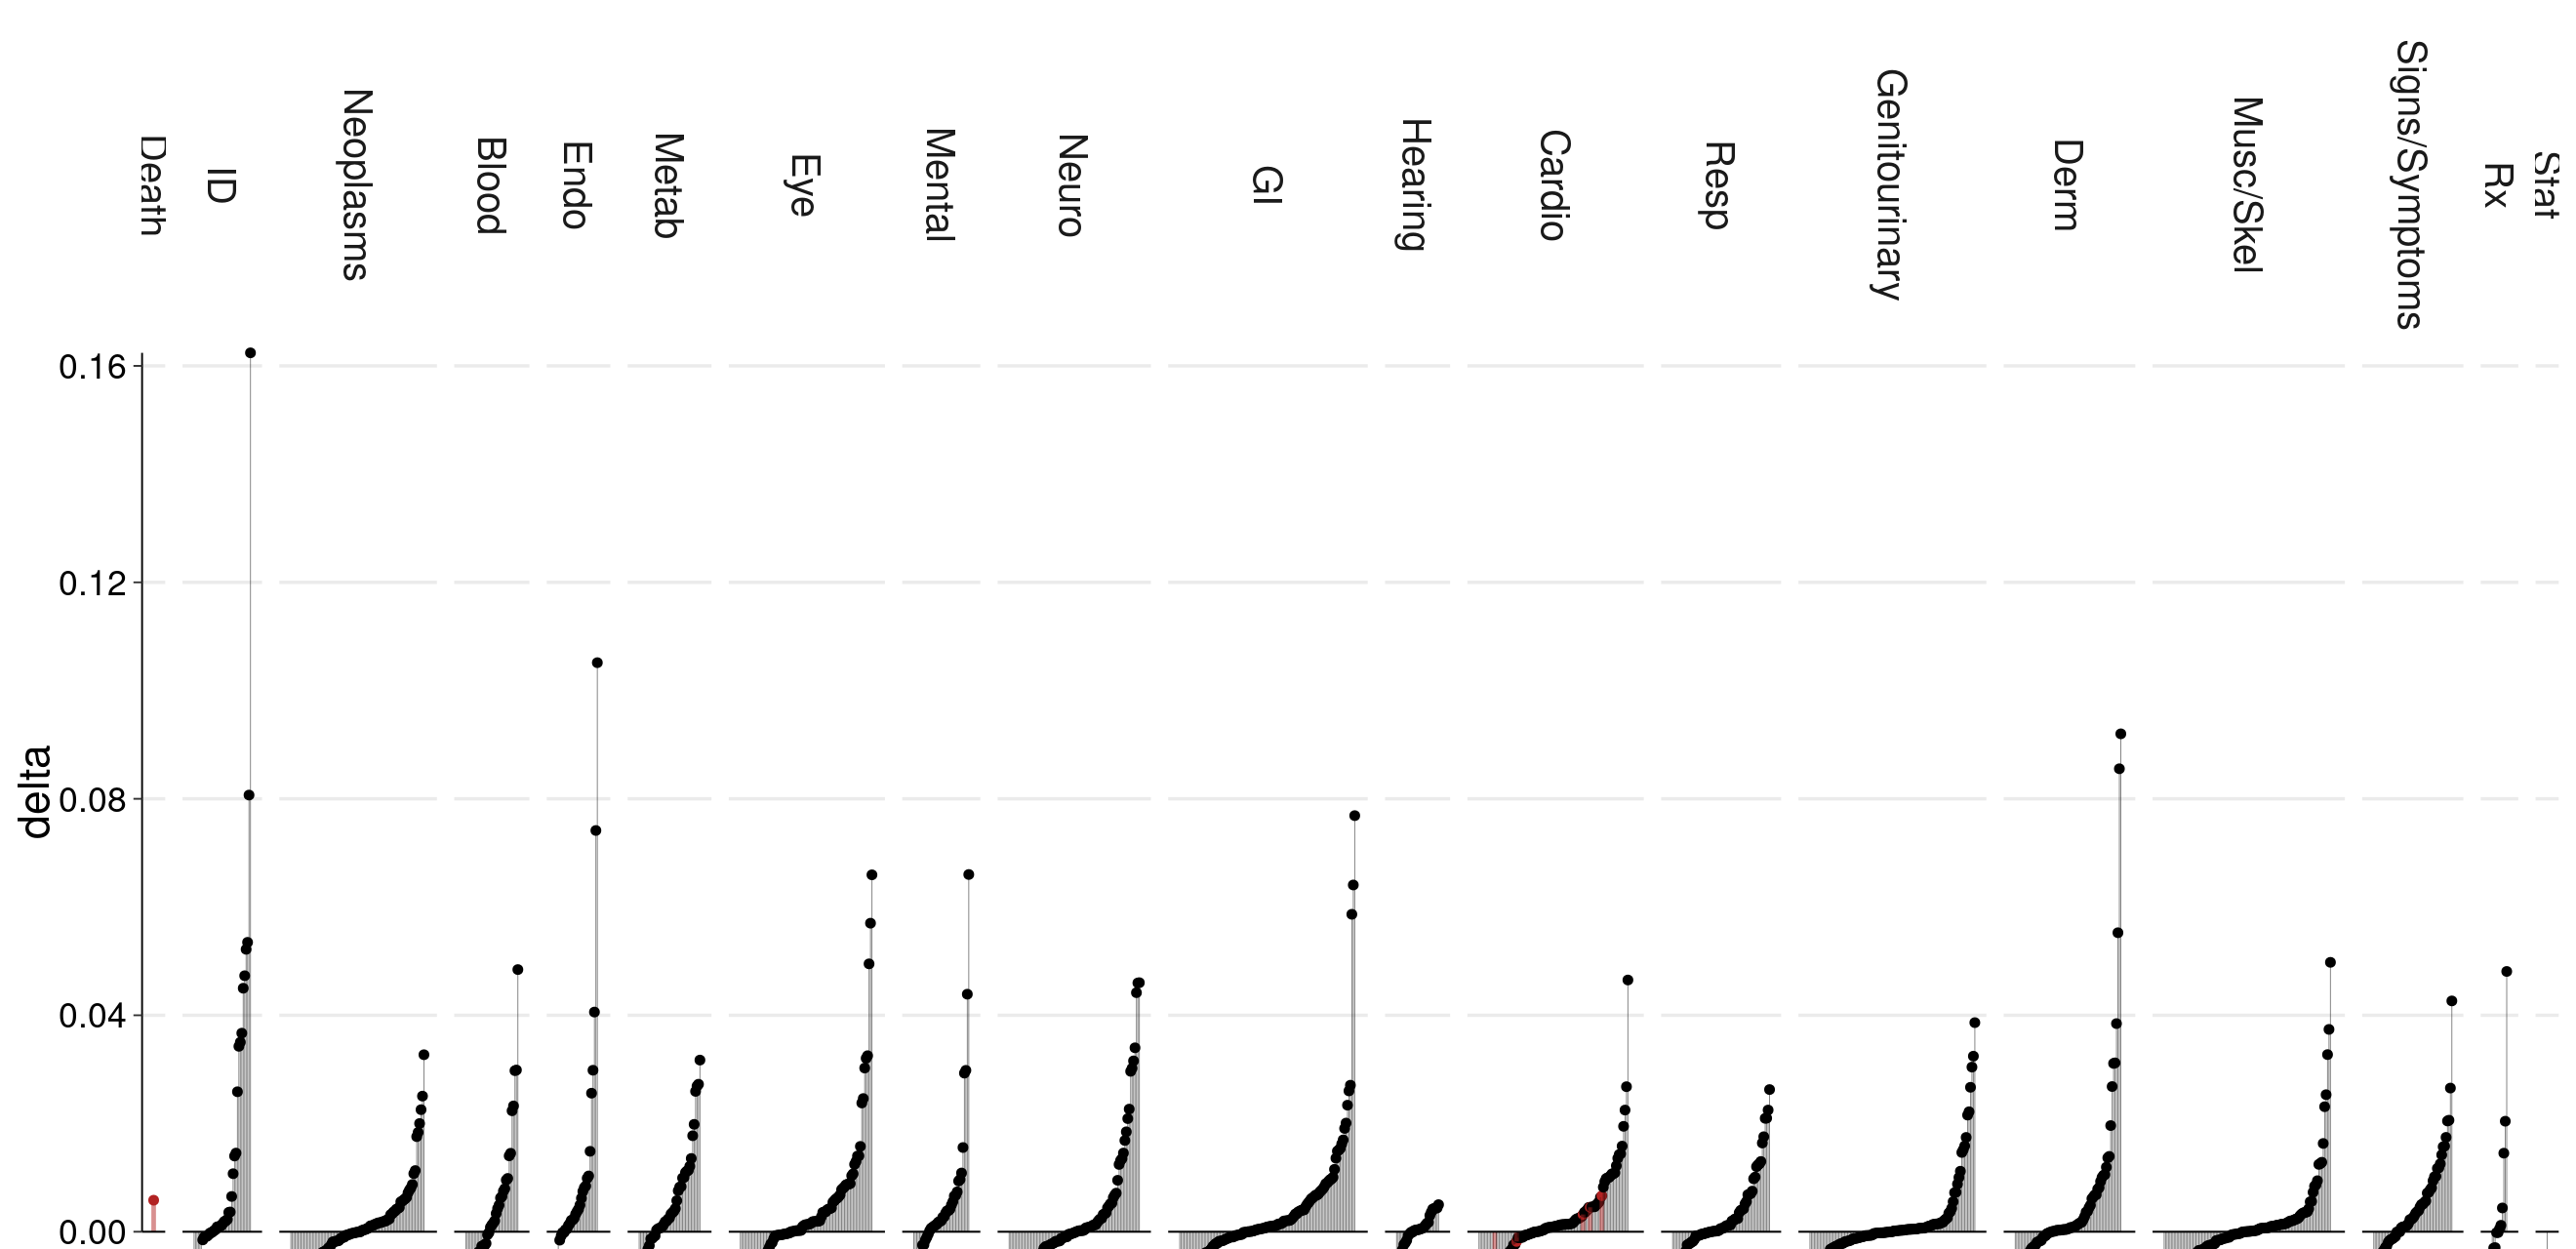

In [48]:
ggplot(temp) + 
    geom_point(aes(x=endpoint, y=delta, color=highlight), size=0.5) +
    geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    #scale_alpha_manual(values=c("NO"=0.3, "YES"=0.7))+
    scale_size_manual(values=c("NO"=0.1, "YES"=0.5))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    coord_cartesian(ylim=c(0, NA), clip = "off")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=8))+
    facet_grid(~phecode_category, scale="free_x", space="free_x")+#, switch=TRUE)+
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
     strip.text = element_text(angle=270)) + 
    theme(legend.position="none")
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1) 

In [49]:
library(ggdist)

In [50]:
table_2 = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    #select(endpoint, iteration, phecode_string, phecode_category, sex, `Age+Sex`, `Age+Sex+Retina`, delta) %>%
    pivot_longer(all_of(c("Age+Sex", "Age+Sex+Retina", "delta")), names_to="type", values_to="cindex") %>%
    group_by(endpoint, phecode_string, phecode_category, type) %>%
    median_qi(cindex) %>%
    #ungroup() %>%
    mutate(agg = glue("{round(cindex, 3)} ({round(.lower, 3)}, {round(.upper, 3)})")) %>%
    ungroup() %>% select(endpoint, phecode_string, phecode_category, type, agg) %>%
    pivot_wider(names_from=type, values_from=agg)
    #mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    #mutate(endpoint = fct_reorder(endpoint, delta))# %>% filter(endpoint %in% endpoint_sample)

In [51]:
table_2 %>% 
    select(all_of(c("endpoint", "phecode_string", "Age+Sex", 'Age+Sex+Retina', "delta"))) %>%
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    filter(endpoint %in% endpoint_selection) %>%
    arrange(endpoint)

endpoint,phecode_string,Age+Sex,Age+Sex+Retina,delta
<fct>,<chr>,<glue>,<glue>,<glue>
phecode_410-2,Endocarditis,"0.674 (0.621, 0.725)","0.65 (0.586, 0.697)","-0.027 (-0.044, -0.01)"
phecode_420,Cardiac arrest,"0.561 (0.513, 0.638)","0.547 (0.498, 0.624)","-0.009 (-0.025, 0.004)"
phecode_440-3,Pulmonary embolism,"0.644 (0.604, 0.688)","0.641 (0.599, 0.677)","-0.006 (-0.026, 0.006)"
phecode_705-1,Rheumatoid arthritis,"0.64 (0.584, 0.699)","0.636 (0.587, 0.696)","-0.003 (-0.011, 0.003)"
phecode_431-11,Cerebral infarction [Ischemic stroke],"0.694 (0.65, 0.746)","0.693 (0.648, 0.745)","-0.002 (-0.003, 0)"
phecode_413-11,Mitral valve insufficiency,"0.698 (0.659, 0.726)","0.699 (0.664, 0.73)","-0.001 (-0.01, 0.01)"
phecode_438-11,Abdominal aortic aneurysm,"0.627 (0.572, 0.688)","0.628 (0.573, 0.689)","0 (0, 0.001)"
phecode_718,Back pain,"0.504 (0.501, 0.507)","0.505 (0.502, 0.508)","0.001 (0.001, 0.002)"
phecode_416-21,Atrial fibrillation,"0.6 (0.583, 0.62)","0.602 (0.584, 0.62)","0.001 (0, 0.003)"


In [52]:
options(pillar.print_max = Inf)
table_2 %>% 
    select(all_of(c("phecode_category", "endpoint", "phecode_string", "Age+Sex", 'Age+Sex+Retina', "delta"))) %>%
    mutate(endpoint = factor(endpoint, levels = endpoint_order)) %>% 
    #filter(endpoint %in% endpoint_selection) %>%
    arrange(endpoint) %>% 
    write_csv("outputs/SupplTable1_DiscriminativePerformanceAll.csv")

In [53]:
table_2 %>% filter(endpoint %in% endpoint_selection) %>% arrange(as.character(endpoint))

endpoint,phecode_string,phecode_category,Age+Sex,Age+Sex+Retina,delta
<fct>,<chr>,<chr>,<glue>,<glue>,<glue>
OMOP_4306655,All-Cause Death,Death,"0.708 (0.69, 0.728)","0.713 (0.695, 0.733)","0.006 (-0.001, 0.011)"
phecode_164,Anemia,Blood,"0.534 (0.528, 0.545)","0.541 (0.534, 0.55)","0.006 (0.004, 0.008)"
phecode_202,Diabetes mellitus,Endo,"0.57 (0.559, 0.583)","0.581 (0.57, 0.594)","0.01 (0.006, 0.014)"
phecode_284,Suicide ideation and attempt or self harm,Mental,"0.558 (0.532, 0.594)","0.571 (0.534, 0.61)","0.01 (0.002, 0.02)"
phecode_324-11,Parkinson's disease (Primary),Neuro,"0.777 (0.708, 0.84)","0.779 (0.711, 0.84)","0.002 (0, 0.004)"
phecode_400,Rheumatic fever and chronic rheumatic heart diseases,Cardio,"0.685 (0.632, 0.731)","0.699 (0.638, 0.747)","0.014 (-0.006, 0.036)"
phecode_401,Hypertension,Cardio,"0.552 (0.546, 0.56)","0.554 (0.548, 0.562)","0.002 (0.001, 0.003)"
phecode_404,Ischemic heart disease,Cardio,"0.639 (0.62, 0.663)","0.642 (0.622, 0.666)","0.003 (0.002, 0.005)"
phecode_404-1,Myocardial infarction [Heart attack],Cardio,"0.668 (0.627, 0.698)","0.672 (0.632, 0.701)","0.005 (0.001, 0.008)"
